In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
#data = yf.download('EURJPY=X', period='1mo', interval='1h')

data = yf.download('EURJPY=X', period='10y')

[*********************100%%**********************]  1 of 1 completed


In [46]:
data.sort_index()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-09,131.733002,132.005005,130.981003,131.714996,131.714996,0
2013-09-10,132.177002,133.259995,131.919006,132.179993,132.179993,0
2013-09-11,133.069000,133.328003,132.809006,133.039993,133.039993,0
2013-09-12,132.880005,132.979004,131.763000,132.910004,132.910004,0
2013-09-13,132.380005,132.638000,131.656998,132.421997,132.421997,0
...,...,...,...,...,...,...
2023-09-05,158.136002,158.391006,157.807999,158.136002,158.136002,0
2023-09-06,158.130005,158.431000,157.802002,158.130005,158.130005,0
2023-09-07,158.397003,158.509003,157.399002,158.397003,158.397003,0


<Axes: xlabel='Date'>

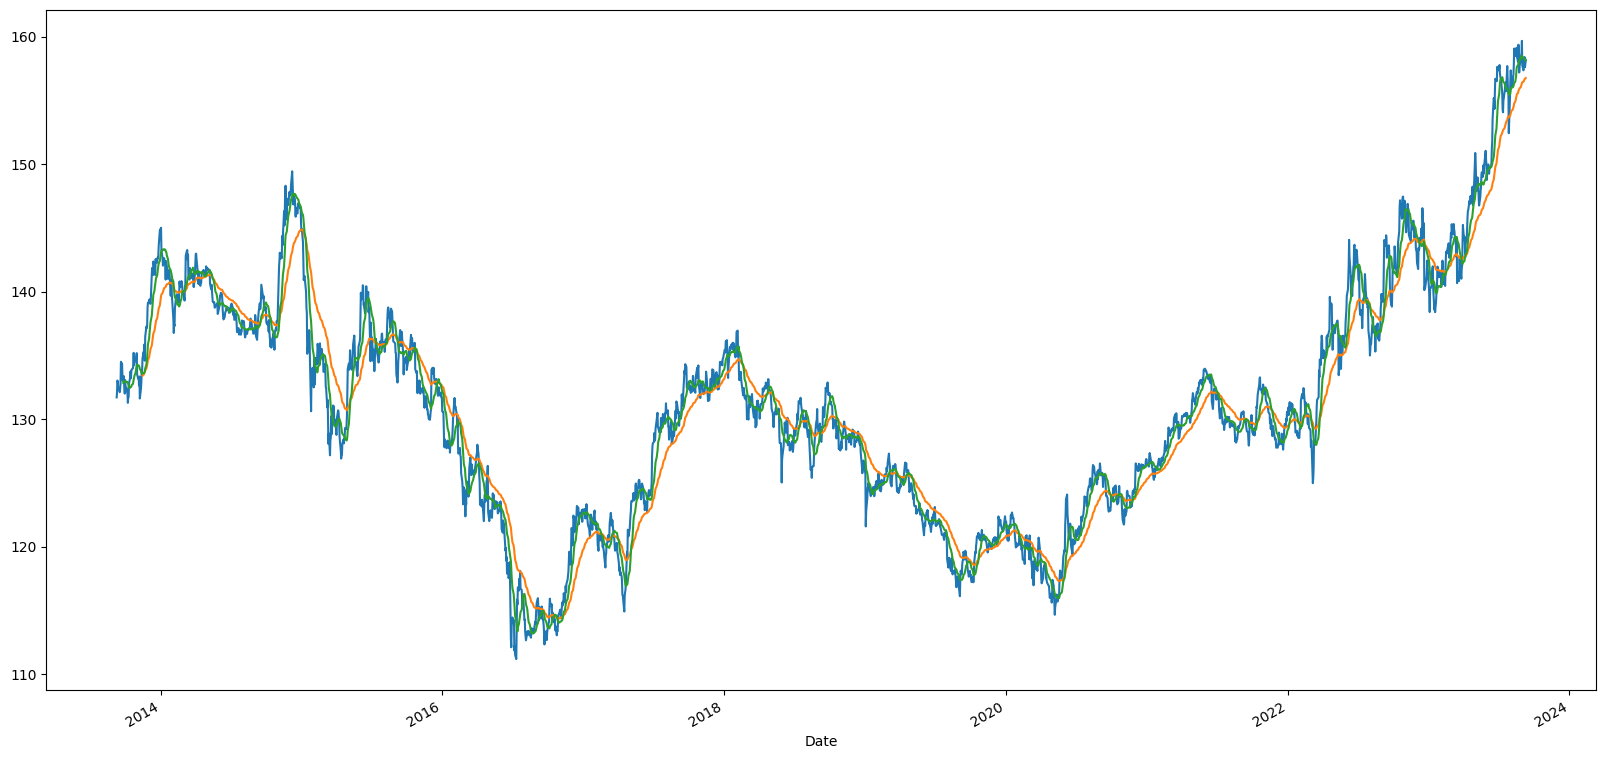

In [47]:
data.Close.plot(figsize=[20,10])
data.Close.ewm(span=50,min_periods=50).mean().plot(figsize=[20,10])
data.Close.rolling(14).mean().plot(figsize=[20,10])

In [48]:
# def macd_indicator(data,a,b,c):
#     """function to calculate MACD
#        typical values a = 12; b =26, c =9"""
#     data = data.copy()
#     data["MA_Fast"]=data["Close"].ewm(span=a,min_periods=a).mean()
#     data["MA_Slow"]=data["Close"].ewm(span=b,min_periods=b).mean()
#     data["MACD"]=data["MA_Fast"]-data["MA_Slow"]
#     data["Signal"]=data["MACD"].ewm(span=c,min_periods=c).mean()
#     return (data["MACD"],data["Signal"])

In [49]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-09-09,131.733002,132.005005,130.981003,131.714996,131.714996,0
2013-09-10,132.177002,133.259995,131.919006,132.179993,132.179993,0
2013-09-11,133.069000,133.328003,132.809006,133.039993,133.039993,0
2013-09-12,132.880005,132.979004,131.763000,132.910004,132.910004,0
2013-09-13,132.380005,132.638000,131.656998,132.421997,132.421997,0
...,...,...,...,...,...,...
2023-09-05,158.136002,158.391006,157.807999,158.136002,158.136002,0
2023-09-06,158.130005,158.431000,157.802002,158.130005,158.130005,0
2023-09-07,158.397003,158.509003,157.399002,158.397003,158.397003,0


In [50]:
data['Close']

Date
2013-09-09    131.714996
2013-09-10    132.179993
2013-09-11    133.039993
2013-09-12    132.910004
2013-09-13    132.421997
                 ...    
2023-09-05    158.136002
2023-09-06    158.130005
2023-09-07    158.397003
2023-09-08    157.602997
2023-09-10    158.181000
Name: Close, Length: 2609, dtype: float64

In [51]:
df = data.copy()

In [52]:
df= df.reset_index() 

In [53]:
df['weekday'] = df.Date.dt.weekday
df['day'] = df.Date.dt.day
df['quarter'] = df.Date.dt.quarter
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [54]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,weekday,day,quarter,month,year
0,2013-09-09,131.733002,132.005005,130.981003,131.714996,131.714996,0,0,9,3,9,2013
1,2013-09-10,132.177002,133.259995,131.919006,132.179993,132.179993,0,1,10,3,9,2013
2,2013-09-11,133.069000,133.328003,132.809006,133.039993,133.039993,0,2,11,3,9,2013
3,2013-09-12,132.880005,132.979004,131.763000,132.910004,132.910004,0,3,12,3,9,2013
4,2013-09-13,132.380005,132.638000,131.656998,132.421997,132.421997,0,4,13,3,9,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
2604,2023-09-05,158.136002,158.391006,157.807999,158.136002,158.136002,0,1,5,3,9,2023
2605,2023-09-06,158.130005,158.431000,157.802002,158.130005,158.130005,0,2,6,3,9,2023
2606,2023-09-07,158.397003,158.509003,157.399002,158.397003,158.397003,0,3,7,3,9,2023
2607,2023-09-08,157.602997,158.373001,157.115997,157.602997,157.602997,0,4,8,3,9,2023


In [59]:
features = ['weekday', 'day', 'quarter', 'month', 'year']
target = 'Close'

In [60]:
X = df[features]
y = df[target]

In [61]:
X

,weekday,day,quarter,month,year
0,0,9,3,9,2013
1,1,10,3,9,2013
2,2,11,3,9,2013
3,3,12,3,9,2013
4,4,13,3,9,2013
...,...,...,...,...,...
2604,1,5,3,9,2023
2605,2,6,3,9,2023
2606,3,7,3,9,2023
2607,4,8,3,9,2023


In [62]:
y

0       131.714996
1       132.179993
2       133.039993
3       132.910004
4       132.421997
           ...    
2604    158.136002
2605    158.130005
2606    158.397003
2607    157.602997
2608    158.181000
Name: Close, Length: 2609, dtype: float64

In [67]:
cutoff = int(df.shape[0]*0.8) #type casting

In [71]:
X_train = X.iloc[:cutoff]
X_test = X.iloc[cutoff:]

In [74]:
y_train = y.iloc[:cutoff]
y_test = y.iloc[cutoff:]

In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [93]:
LR = LinearRegression()
RF = RandomForestRegressor()

In [94]:
model = RF.fit(X_train, y_train)

In [95]:
y_pred = model.predict(X_test)

In [96]:
y_pred

array([130.240401  , 130.18328079, 130.17947006, 129.98311005,
       129.31626038, 128.88035904, 128.82080963, 128.83630936,
       128.77981018, 128.80513062, 128.80994995, 129.53203125,
       129.62519028, 129.69181885, 129.62251205, 130.19856995,
       130.43607925, 130.3903978 , 130.43685684, 130.39197891,
       130.4724678 , 130.18238052, 130.18042999, 130.21913025,
       130.1778418 , 129.94646103, 128.81494995, 128.82895828,
       128.71623993, 128.74434006, 128.64660965, 129.11147049,
       129.50398056, 129.51291153, 129.54355453, 129.58627258,
       130.17850006, 130.29509918, 130.39234802, 130.39385941,
       130.43675919, 130.47857681, 130.26033966, 130.25528946,
       130.17964142, 130.20418152, 129.99177032, 129.36821884,
       128.96710892, 128.70667145, 128.62215988, 128.84773041,
       128.88942017, 128.92503021, 129.09254105, 129.38609451,
       129.68916901, 129.70716782, 130.15437958, 130.31627014,
       130.43842941, 130.43416916, 130.39763687, 130.48

In [97]:
y_test

2087    129.785004
2088    129.830002
2089    129.895996
2090    129.496994
2091    129.281998
           ...    
2604    158.136002
2605    158.130005
2606    158.397003
2607    157.602997
2608    158.181000
Name: Close, Length: 522, dtype: float64

<Axes: >

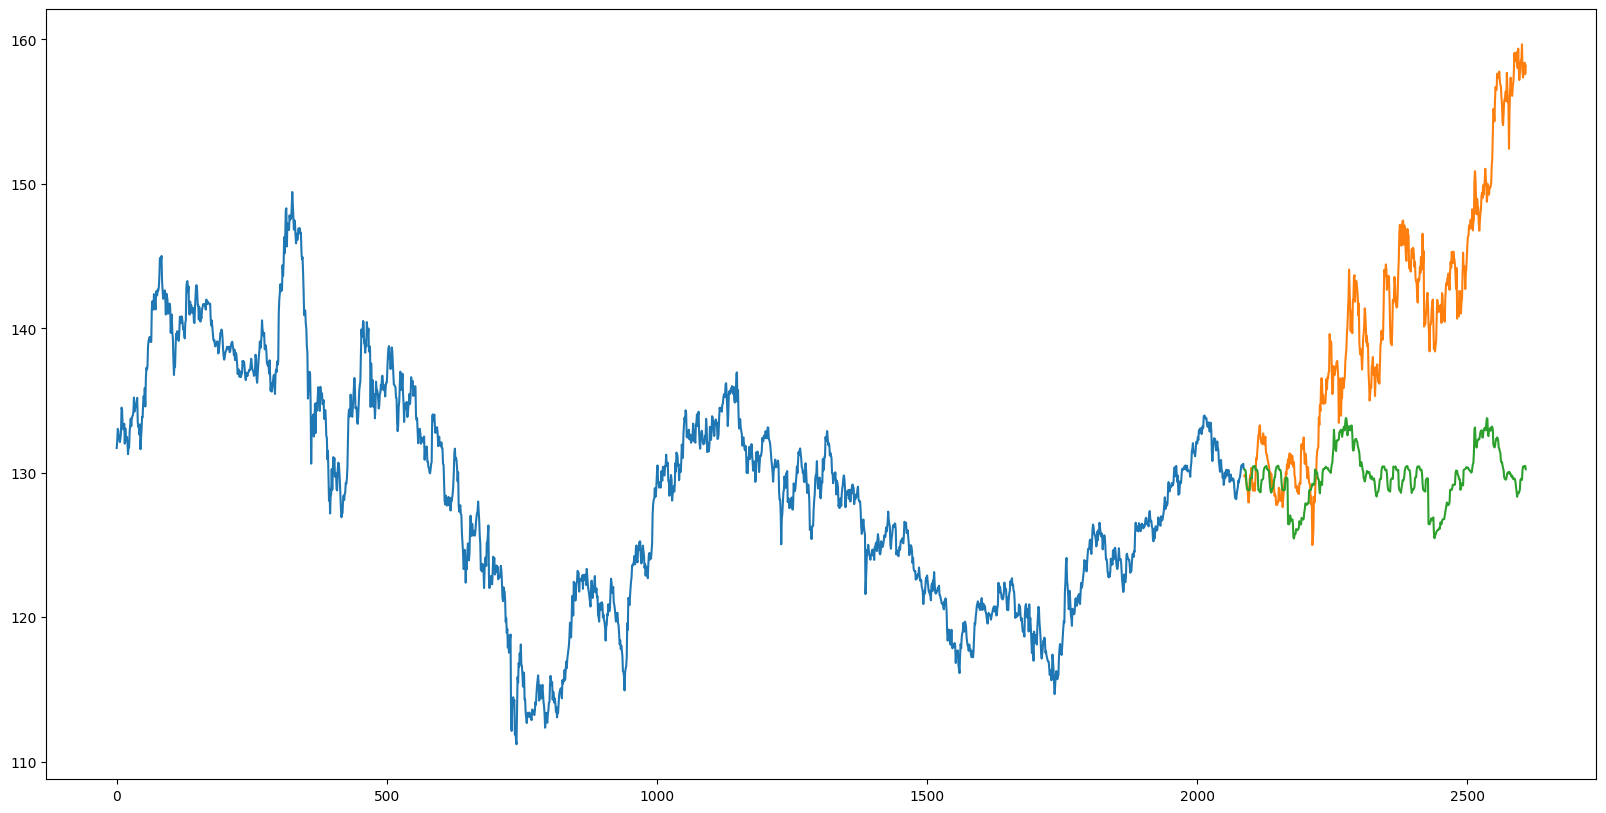

In [98]:
y_train.plot(figsize = [20,10])
y_test.plot(figsize = [20,10])
pd.Series(y_pred,index = y_test.index).plot(figsize = [20,10])